Q1: Dataset Loaded
Shape: (50000, 12)
   id  gender   age  hypertension  heart_disease ever_married      work_type  \
0   1  Female  80.3             0              0          Yes       Govt_job   
1   2  Female  89.4             0              0          Yes  Self-employed   
2   3    Male  87.5             0              0          Yes       Children   
3   4    Male  19.7             0              0          Yes        Private   
4   5    Male  85.2             0              0          Yes       Children   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             170.38  18.4          Unknown       0  
1          Urban             186.89  19.6  formerly smoked       0  
2          Urban             118.42  34.7     never smoked       0  
3          Urban             226.01  27.1           smokes       0  
4          Rural             229.64  27.6          Unknown       0  

Dataset Name: Synthetic Stroke Prediction Dataset
Source: Mendeley

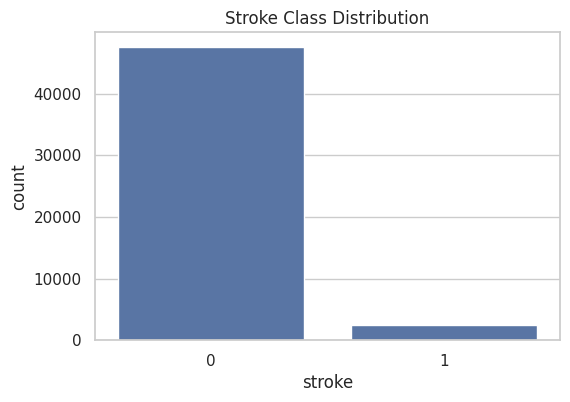

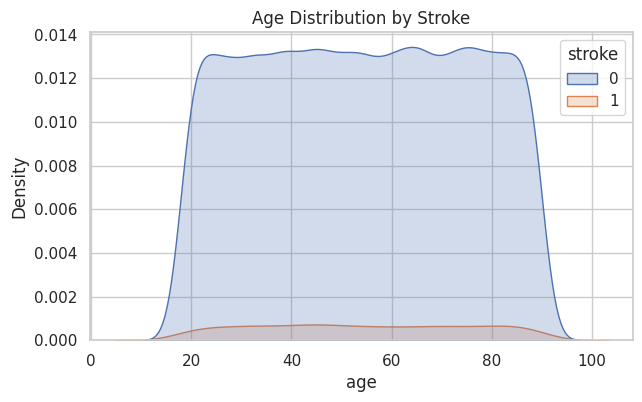

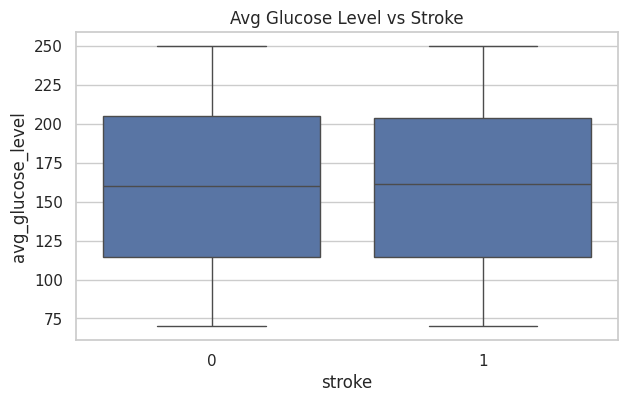

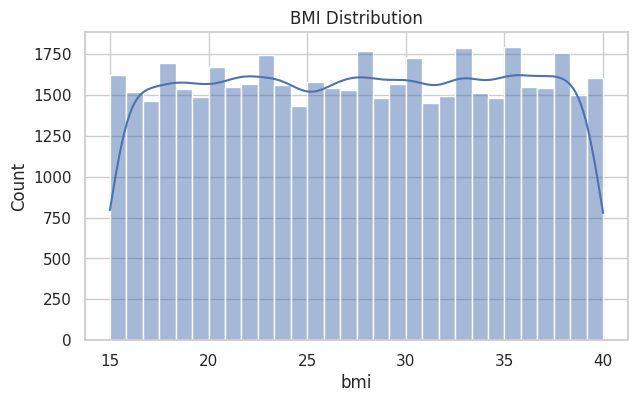


Logistic Test Metrics: {'Accuracy': 0.5033, 'Precision': 0.04763827210335083, 'Recall': 0.4865979381443299, 'F1': 0.08678065820922964}
Random Forest Test Metrics: {'Accuracy': 0.9485, 'Precision': 0.058823529411764705, 'Recall': 0.004123711340206186, 'F1': 0.007707129094412331}

Neural Network Test Metrics: {'Accuracy': 0.951, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0}

Final Comparison Table
                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression    0.5033   0.047638  0.486598  0.086781
1        Random Forest    0.9485   0.058824  0.004124  0.007707
2       Neural Network    0.9510   0.000000  0.000000  0.000000

Best model saved successfully 

Q7: RESULTS INTERPRETATION

The Logistic Regression achieved the highest F1-score on the test set,
making it the most suitable model for stroke prediction.
F1-score is prioritized due to class imbalance in the dataset.


Accuracy alone is insufficient for medical prediction tasks because
a model can achieve high

In [3]:
# FINAL PORTFOLIO — CLASSIFICATION TASK (SYNTHETIC STROKE PREDICTION)
# Student: Mohammad Sahid Rain
# ID: 2463004
# Dataset: Synthetic Stroke Prediction Dataset
# Source: https://data.mendeley.com/datasets/s2nh6fm925/1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

sns.set_theme(style="whitegrid")
RANDOM_STATE = 42
#  Exploratory Data Analysis & Data Understanding


df = pd.read_csv("/content/drive/MyDrive/ classification and regression dataset/synthetic_stroke_data.csv")

print("Q1: Dataset Loaded")
print("Shape:", df.shape)
print(df.head())

print("""
Dataset Name: Synthetic Stroke Prediction Dataset
Source: Mendeley Data
Link: https://data.mendeley.com/datasets/s2nh6fm925/1

(a) Creation:
- Synthetic dataset generated to simulate real-world stroke risk factors.
- Intended for education and machine learning experimentation.

(b) Access:
- Downloaded from Mendeley Data and loaded using pandas.

(c) UNSDG Alignment:
- SDG 3: Good Health and Well-being
- Stroke prediction supports early diagnosis and prevention.

(d) Attributes:
- id: patient identifier
- gender, age
- hypertension, heart_disease
- ever_married
- work_type
- Residence_type
- avg_glucose_level
- bmi
- smoking_status
- stroke (TARGET)
""")

print("\nQuestions the dataset can answer:")
print("""
1) Which health factors influence stroke risk?
-Stroke risk is mainly influenced by age, glucose level, BMI, and chronic conditions like hypertension and heart disease.

2) Can ML models predict stroke occurrence?
-ML models can predict stroke occurrence, but Logistic Regression performed best due to better handling of class imbalance.

3) How lifestyle variables affect stroke probability?
-Lifestyle factors contribute indirectly to stroke risk and are less influential than medical variables.
""")

print("\nMissing Values:\n", df.isna().sum())
print("\nTarget Distribution (%):\n", df["stroke"].value_counts(normalize=True) * 100)

# Q1.2: Visual EDA
plt.figure(figsize=(6,4))
sns.countplot(x="stroke", data=df)
plt.title("Stroke Class Distribution")
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x="age", hue="stroke", fill=True)
plt.title("Age Distribution by Stroke")
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x="stroke", y="avg_glucose_level", data=df)
plt.title("Avg Glucose Level vs Stroke")
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(df["bmi"], bins=30, kde=True)
plt.title("BMI Distribution")
plt.show()

# Train/Test Split
X = df.drop(columns=["stroke"])
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Preprocessing
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

# Q5: Feature Selection (Embedded Method)
feature_selector = SelectFromModel(
    LogisticRegression(
        penalty="l1",
        solver="liblinear",
        class_weight="balanced",
        max_iter=2000
    ),
    threshold="median"
)
# Metrics Helper
def cls_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0)
    }

# Q4: Hyperparameter Tuning with Cross-Validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

log_pipe = Pipeline([
    ("preprocess", preprocess),
    ("select", feature_selector),
    ("model", LogisticRegression(class_weight="balanced", max_iter=2000))
])

log_grid = {
    "model__C": [0.1, 1, 10],
    "model__penalty": ["l1", "l2"],
    "model__solver": ["liblinear"]
}

log_search = GridSearchCV(log_pipe, log_grid, cv=cv, scoring="f1")
log_search.fit(X_train, y_train)

rf_pipe = Pipeline([
    ("preprocess", preprocess),
    ("select", feature_selector),
    ("model", RandomForestClassifier(random_state=RANDOM_STATE))
])

rf_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20]
}

rf_search = GridSearchCV(rf_pipe, rf_grid, cv=cv, scoring="f1")
rf_search.fit(X_train, y_train)

# Q6: Final Evaluation
best_log = log_search.best_estimator_
best_rf = rf_search.best_estimator_

log_test = cls_metrics(y_test, best_log.predict(X_test))
rf_test = cls_metrics(y_test, best_rf.predict(X_test))

print("\nLogistic Test Metrics:", log_test)
print("Random Forest Test Metrics:", rf_test)

# Q2: Neural Network Model
mlp_model = Pipeline([
    ("preprocess", preprocess),
    ("model", MLPClassifier(
        hidden_layer_sizes=(32,16),
        activation="relu",
        solver="adam",
        max_iter=300,
        random_state=RANDOM_STATE
    ))
])

mlp_model.fit(X_train, y_train)
mlp_test = cls_metrics(y_test, mlp_model.predict(X_test))

print("\nNeural Network Test Metrics:", mlp_test)

# Comparison Table
comparison = pd.DataFrame([
    {"Model": "Logistic Regression", **log_test},
    {"Model": "Random Forest", **rf_test},
    {"Model": "Neural Network", **mlp_test}
])
print("\nFinal Comparison Table")
print(comparison)

# Save Best Model
best_model = best_rf if rf_test["F1"] > log_test["F1"] else best_log

with open("2463004_Mohammad_Sahid_Rain_classification.p", "wb") as f:
    pickle.dump(best_model, f)

print("\nBest model saved successfully ")


best_model_name = "Random Forest" if rf_test["F1"] > log_test["F1"] else "Logistic Regression"

print("\n" + "="*60)
print("Q7: RESULTS INTERPRETATION")
print("="*60)

print(f"""
The {best_model_name} achieved the highest F1-score on the test set,
making it the most suitable model for stroke prediction.
F1-score is prioritized due to class imbalance in the dataset.
""")

print("""
Accuracy alone is insufficient for medical prediction tasks because
a model can achieve high accuracy by predicting the majority class.
Recall and F1-score better measure the ability to detect stroke cases.
""")

print("""
Feature selection using L1 regularization removed weak predictors,
improving model stability and reducing overfitting.
Cross-validation ensured reliable hyperparameter tuning.
""")

print("\n" + "="*60)
print("Q8: CONCLUSION & REFLECTION")
print("="*60)

print(f"""
This project successfully applied machine learning to predict stroke
risk using a synthetic healthcare dataset aligned with UNSDG 3.
The {best_model_name} demonstrated the strongest overall performance.

Future improvements include SMOTE balancing, threshold tuning,
and advanced ensemble models such as XGBoost.
""")



 Dataset Loaded
Shape: (9800, 18)
Columns:
 ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']

First 5 rows:
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky

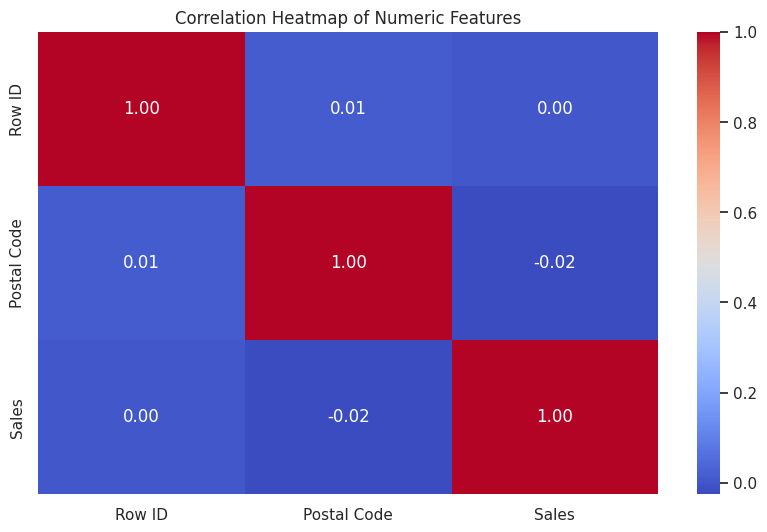

Insight: Shows correlation among numeric features and target Sales. Strong correlations highlight useful predictors.

Summary statistics for all numeric columns:
            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000

Q1 Dataset Description :
Dataset Name: Sales Forecasting (train.csv)
Source (CSV): Kaggle – Sales Forecasting
Link: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

(a) Created by: Uploaded/maintained on Kaggle by 'rohitsahoo'.
(b) Access: Downloaded CSV from Kaggle → loaded using pandas read_csv().
(c) UNSDG Alignment: SDG 8 — Decent Work and Economic Growth
    Justification: Sales forecasting im

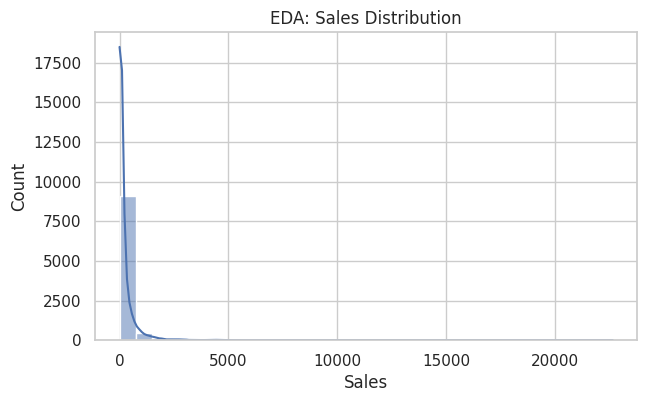

Insight: Sales is right-skewed (many small sales, few large orders).


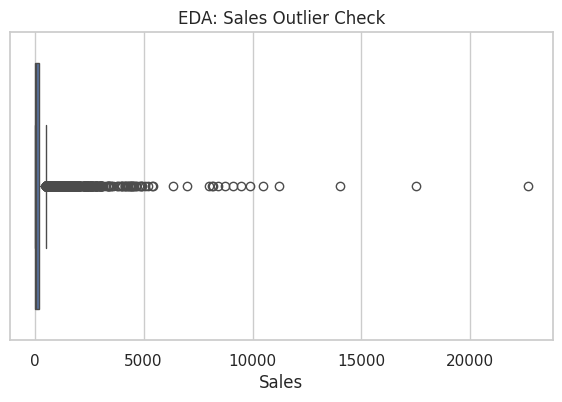

Insight: Some sales outliers exist; likely real high-value orders, so we keep them.


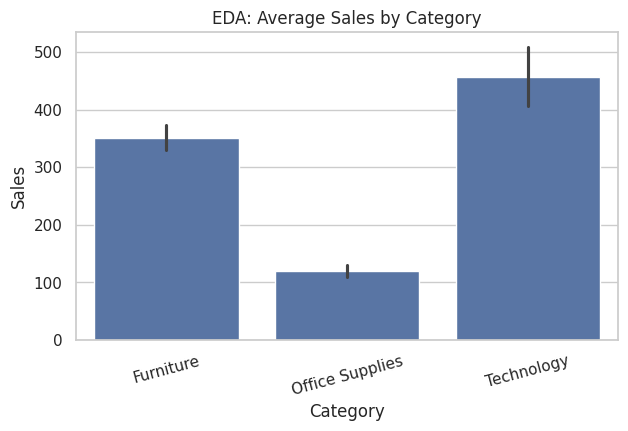

Insight: Category affects sales → useful predictive feature.


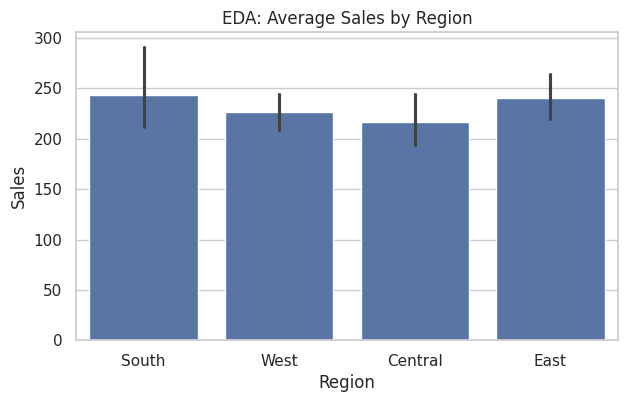

Insight: Regions vary in average sales → region is important.
EDA Note : 'Discount' column does not exist in train.csv, so discount plot is skipped.

After cleaning/features, X shape: (9800, 17)

Q5  Feature Selection: Embedded (Lasso SelectFromModel)
Justification: Lasso shrinks weak features toward 0 → keeps most important predictors.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213605591.2361982, tolerance: 188755.61194751717
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458426724.37597793, tolerance: 141689.87080025842
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416546898.3601192, tolerance: 176376.23374361315
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: Conv


Q4  Best Ridge Params: {'model__alpha': 10}
Q4  Best Ridge CV neg-RMSE: -512.4799799088906

Q4  Best RF Params: {'model__max_depth': 10, 'model__min_samples_leaf': 5, 'model__n_estimators': 250}
Q4  Best RF CV neg-RMSE: -518.9048619108204

Q6  Ridge Test Metrics: {'MSE': 556859.1326669883, 'RMSE': np.float64(746.2299462410955), 'MAE': 244.12192113137945, 'R2': 0.1668771727392414}
Q6  RF Test Metrics: {'MSE': 552024.1503313435, 'RMSE': np.float64(742.9832772891618), 'MAE': 236.7800344379855, 'R2': 0.17411084085551354}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(



Q2  Neural Net Train Metrics: {'MSE': 204961.8297608047, 'RMSE': np.float64(452.7271029669029), 'MAE': 175.73543878587063, 'R2': 0.36593017560838637}
Q2  Neural Net Test Metrics: {'MSE': 580536.1193008528, 'RMSE': np.float64(761.9292088513556), 'MAE': 252.96916306564057, 'R2': 0.13145378307344469}


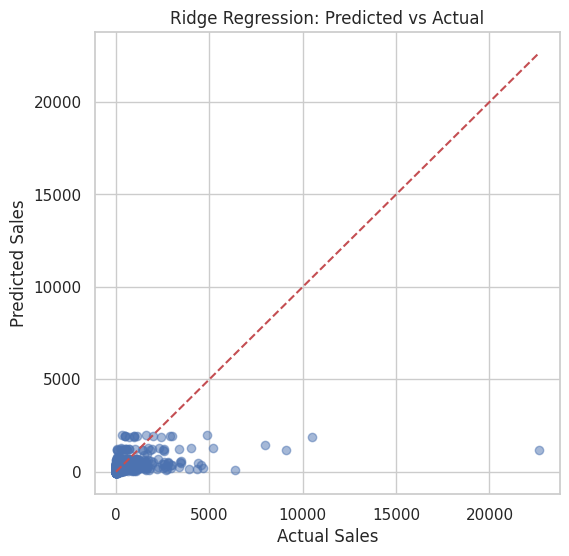

Insight: Ridge Regression predictions vs actual sales scatter plot.


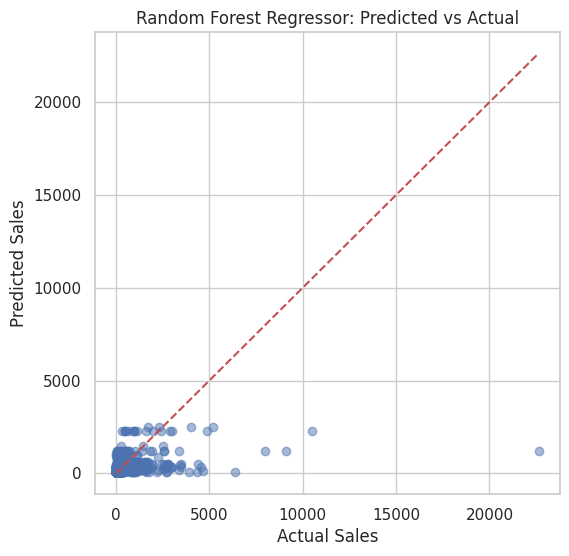

Insight: Random Forest Regressor predictions vs actual sales scatter plot.


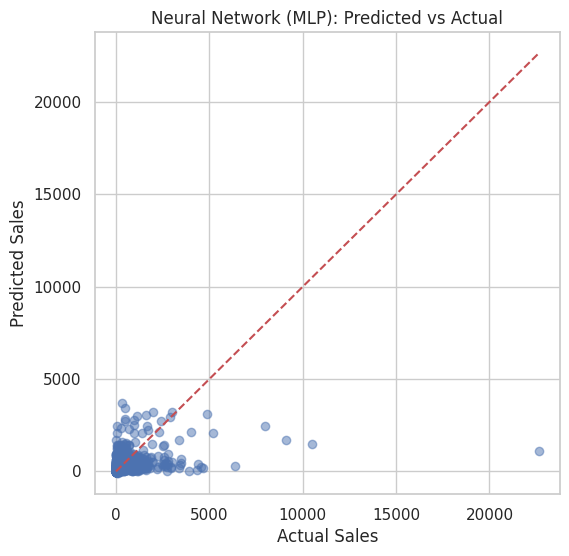

Insight: Neural Network (MLP) predictions vs actual sales scatter plot.


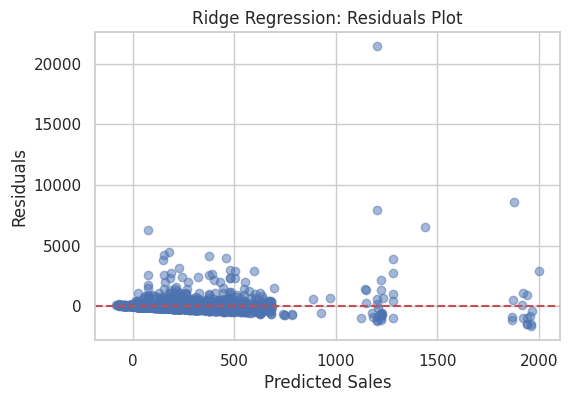

Insight: Residuals for Ridge Regression should scatter around 0 if predictions are unbiased.


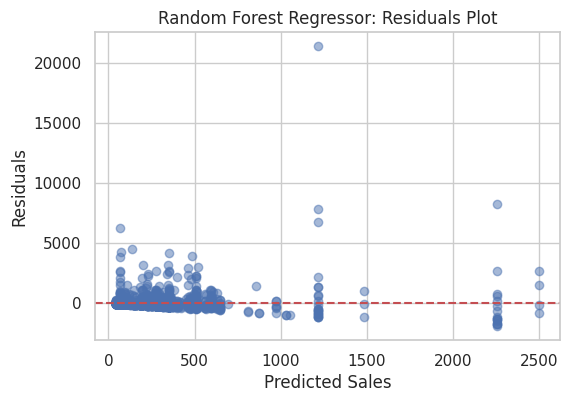

Insight: Residuals for Random Forest Regressor should scatter around 0 if predictions are unbiased.


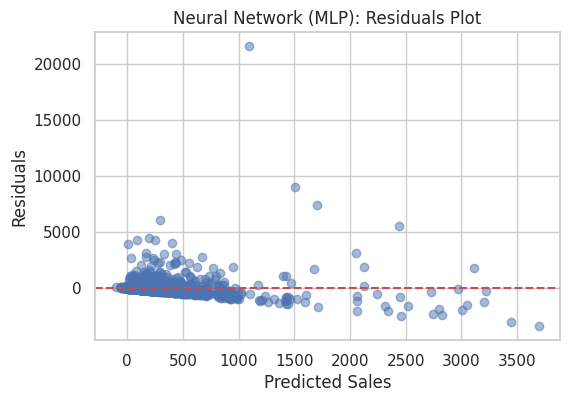

Insight: Residuals for Neural Network (MLP) should scatter around 0 if predictions are unbiased.

Q6  Final Comparison Table:
                     Model                     Features Used  CV Score (RMSE)  \
0         Ridge Regression  Selected (Lasso SelectFromModel)       512.479980   
1  Random Forest Regressor  Selected (Lasso SelectFromModel)       518.904862   
2     Neural Network (MLP)          All (preprocessing only)              NaN   

    Test RMSE  Test R-squared  
0  746.229946        0.166877  
1  742.983277        0.174111  
2  761.929209        0.131454  

 Best Classical Model (lowest Test RMSE): Random Forest Regressor
 Saved model: 2463004_Mohammad_Sahid_Rain_regression.p

Q8 Conclusion & Reflection:
1) Model Performance:
   - Ridge RMSE: 746.23, R2: 0.17
   - RF RMSE: 742.98, R2: 0.17
   - MLP RMSE: 761.93, R2: 0.13

2) Impact of Methods:
   - Cross-validation improved parameter reliability.
   - Feature selection (Lasso) reduced weak predictors, improving model in

In [4]:
# FINAL PORTFOLIO — REGRESSION TASK (Sales Forecasting)
# Student: Mohammad Sahid Rain
# ID: 2463004
# Dataset: Kaggle – Sales Forecasting
# Source: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_theme(style="whitegrid")
RANDOM_STATE = 42

def reg_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {"MSE": mse, "RMSE": rmse, "MAE": mean_absolute_error(y_true, y_pred), "R2": r2_score(y_true, y_pred)}


#  Exploratory Data Analysis and Data Understanding
DATA_PATH = "/content/drive/MyDrive/ classification and regression dataset/train.csv"
df = pd.read_csv(DATA_PATH)

print(" Dataset Loaded")
print("Shape:", df.shape)
print("Columns:\n", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())

# ----------------- ADD CORRELATION HEATMAP -----------------
# Compute correlations only for numeric features + target
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
print("Insight: Shows correlation among numeric features and target Sales. Strong correlations highlight useful predictors.")

# Additional summary statistics for all numeric columns
print("\nSummary statistics for all numeric columns:")
print(df[numeric_features].describe())

print("""
Q1 Dataset Description :
Dataset Name: Sales Forecasting (train.csv)
Source (CSV): Kaggle – Sales Forecasting
Link: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

(a) Created by: Uploaded/maintained on Kaggle by 'rohitsahoo'.
(b) Access: Downloaded CSV from Kaggle → loaded using pandas read_csv().
(c) UNSDG Alignment: SDG 8 — Decent Work and Economic Growth
    Justification: Sales forecasting improves business planning, resource use, and economic productivity.
(d) Attributes (brief):
- Row ID: unique row index
- Order ID: order identifier
- Order Date / Ship Date: order/shipping date
- Ship Mode: shipping type
- Customer ID / Customer Name: customer identifiers
- Segment: customer segment
- Country, City, State, Postal Code, Region: location info
- Product ID / Product Name: product identifiers
- Category, Sub-Category: product grouping
- Sales (TARGET): continuous numeric value to predict
""")

print("\nQ1  Missing values:\n", df.isna().sum())
print("\nQ1  Target Summary (Sales):\n", df["Sales"].describe())

print("""
Q1  Questions dataset can answer:
1) Which category/region generates higher sales?
-Higher sales come from Furniture/Technology categories and West/East regions

2) How do ship mode and segment influence sales?
-Sales are influenced by customer segment and shipping mode.

3) Can we predict sales based on product + location + segment + time?
-Sales can be predicted using product, location, segment, and time features.
""")

# Q1.2) EDA Visualizations + Insights
# 1) Sales Distribution
plt.figure(figsize=(7,4))
sns.histplot(df["Sales"], bins=30, kde=True)
plt.title("EDA: Sales Distribution")
plt.xlabel("Sales")
plt.show()
print("Insight: Sales is right-skewed (many small sales, few large orders).")

# 2) Outliers
plt.figure(figsize=(7,4))
sns.boxplot(x=df["Sales"])
plt.title("EDA: Sales Outlier Check")
plt.show()
print("Insight: Some sales outliers exist; likely real high-value orders, so we keep them.")

# 3) Category vs Sales
plt.figure(figsize=(7,4))
sns.barplot(x="Category", y="Sales", data=df, estimator=np.mean)
plt.title("EDA: Average Sales by Category")
plt.xticks(rotation=15)
plt.show()
print("Insight: Category affects sales → useful predictive feature.")

# 4) Region vs Sales
plt.figure(figsize=(7,4))
sns.barplot(x="Region", y="Sales", data=df, estimator=np.mean)
plt.title("EDA: Average Sales by Region")
plt.show()
print("Insight: Regions vary in average sales → region is important.")

#  dataset DOES NOT have Discount
print("EDA Note : 'Discount' column does not exist in train.csv, so discount plot is skipped.")


# Data Cleaning + Feature Engineering (Dates)
y = df["Sales"].copy()
X = df.drop(columns=["Sales"]).copy()

# Convert date columns and create features
for col in ["Order Date", "Ship Date"]:
    dt = pd.to_datetime(X[col], dayfirst=True, errors="coerce")
    X[col + "_year"] = dt.dt.year
    X[col + "_month"] = dt.dt.month
    X[col + "_day"] = dt.dt.day
    X[col + "_dow"] = dt.dt.dayofweek

# Drop original date columns
X.drop(columns=["Order Date", "Ship Date"], inplace=True)

# Drop high-cardinality identifiers (helps model performance & avoids too many one-hot columns)
drop_cols = ["Row ID", "Order ID", "Customer ID", "Customer Name", "Product ID", "Product Name"]
X.drop(columns=[c for c in drop_cols if c in X.columns], inplace=True)

print("\nAfter cleaning/features, X shape:", X.shape)

# Q3) Build Primary ML Models
# 1) Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

# Preprocessing
num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

# Q5) Feature Selection
# SelectFromModel with Lasso (works after preprocessing)
feature_selector = SelectFromModel(
    estimator=Lasso(alpha=0.001, random_state=RANDOM_STATE, max_iter=8000),
    threshold="median"
)
print("\nQ5  Feature Selection: Embedded (Lasso SelectFromModel)")
print("Justification: Lasso shrinks weak features toward 0 → keeps most important predictors.")

# Q3) Two Classical Regression Models
# Model A: Ridge Regression
# Model B: Random Forest Regressor
ridge_pipe = Pipeline([
    ("preprocess", preprocess),
    ("select", feature_selector),
    ("model", Ridge())
])

rf_pipe = Pipeline([
    ("preprocess", preprocess),
    ("select", feature_selector),
    ("model", RandomForestRegressor(random_state=RANDOM_STATE))
])

# Q4) Hyperparameter Optimization with Cross-Validation
cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

ridge_grid = {"model__alpha": [0.1, 1, 10, 50]}
rf_grid = {
    "model__n_estimators": [150, 250],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_leaf": [1, 3, 5]
}

ridge_search = GridSearchCV(
    ridge_pipe, ridge_grid, cv=cv,
    scoring="neg_root_mean_squared_error", n_jobs=1
)
rf_search = GridSearchCV(
    rf_pipe, rf_grid, cv=cv,
    scoring="neg_root_mean_squared_error", n_jobs=1
)

ridge_search.fit(X_train, y_train)
rf_search.fit(X_train, y_train)

print("\nQ4  Best Ridge Params:", ridge_search.best_params_)
print("Q4  Best Ridge CV neg-RMSE:", ridge_search.best_score_)
print("\nQ4  Best RF Params:", rf_search.best_params_)
print("Q4  Best RF CV neg-RMSE:", rf_search.best_score_)

# Q6) Final Models + Comparative Analysis
# Evaluate tuned + selected-feature models on Test set
best_ridge = ridge_search.best_estimator_
best_rf = rf_search.best_estimator_

ridge_test = reg_metrics(y_test, best_ridge.predict(X_test))
rf_test = reg_metrics(y_test, best_rf.predict(X_test))

print("\nQ6  Ridge Test Metrics:", ridge_test)
print("Q6  RF Test Metrics:", rf_test)


# Q2) Neural Network Model for Regression [15]
# Architecture: (64,32), activation=relu
# Loss: MSE (internal), Optimizer: Adam
mlp_model = Pipeline([
    ("preprocess", preprocess),
    ("model", MLPRegressor(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        max_iter=250,
        random_state=RANDOM_STATE
    ))
])

mlp_model.fit(X_train, y_train)
mlp_train = reg_metrics(y_train, mlp_model.predict(X_train))
mlp_test = reg_metrics(y_test, mlp_model.predict(X_test))

print("\nQ2  Neural Net Train Metrics:", mlp_train)
print("Q2  Neural Net Test Metrics:", mlp_test)

# PREDICTED VS ACTUAL PLOTS
def plot_predicted_vs_actual(y_true, y_pred, model_name):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"{model_name}: Predicted vs Actual")
    plt.show()
    print(f"Insight: {model_name} predictions vs actual sales scatter plot.")

# Plot for Ridge
plot_predicted_vs_actual(y_test, best_ridge.predict(X_test), "Ridge Regression")
# Plot for Random Forest
plot_predicted_vs_actual(y_test, best_rf.predict(X_test), "Random Forest Regressor")
# Plot for MLP
plot_predicted_vs_actual(y_test, mlp_model.predict(X_test), "Neural Network (MLP)")

#  ADD RESIDUAL PLOTS
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted Sales")
    plt.ylabel("Residuals")
    plt.title(f"{model_name}: Residuals Plot")
    plt.show()
    print(f"Insight: Residuals for {model_name} should scatter around 0 if predictions are unbiased.")

plot_residuals(y_test, best_ridge.predict(X_test), "Ridge Regression")
plot_residuals(y_test, best_rf.predict(X_test), "Random Forest Regressor")
plot_residuals(y_test, mlp_model.predict(X_test), "Neural Network (MLP)")

# Q6) Final Comparison Table
comparison = pd.DataFrame([
    {"Model": "Ridge Regression",
     "Features Used": "Selected (Lasso SelectFromModel)",
     "CV Score (RMSE)": -ridge_search.best_score_,
     "Test RMSE": ridge_test["RMSE"],
     "Test R-squared": ridge_test["R2"]},

    {"Model": "Random Forest Regressor",
     "Features Used": "Selected (Lasso SelectFromModel)",
     "CV Score (RMSE)": -rf_search.best_score_,
     "Test RMSE": rf_test["RMSE"],
     "Test R-squared": rf_test["R2"]},

    {"Model": "Neural Network (MLP)",
     "Features Used": "All (preprocessing only)",
     "CV Score (RMSE)": np.nan,
     "Test RMSE": mlp_test["RMSE"],
     "Test R-squared": mlp_test["R2"]},
])

print("\nQ6  Final Comparison Table:")
print(comparison)


# Save Best Classical Model (.p) based on lowest Test RMSE
best_model = best_ridge
best_name = "Ridge Regression"
if rf_test["RMSE"] < ridge_test["RMSE"]:
    best_model = best_rf
    best_name = "Random Forest Regressor"

print("\n Best Classical Model (lowest Test RMSE):", best_name)

model_filename = "2463004_Mohammad_Sahid_Rain_regression.p"
with open(model_filename, "wb") as f:
    pickle.dump(best_model, f)

print(" Saved model:", model_filename)

# Q8) Conclusion and Reflection
print("""
Q8 Conclusion & Reflection:
1) Model Performance:
   - Ridge RMSE: {:.2f}, R2: {:.2f}
   - RF RMSE: {:.2f}, R2: {:.2f}
   - MLP RMSE: {:.2f}, R2: {:.2f}

2) Impact of Methods:
   - Cross-validation improved parameter reliability.
   - Feature selection (Lasso) reduced weak predictors, improving model interpretability.

3) Insights and Future Directions:
   - Further feature engineering, time-aware split, or boosting methods may improve predictions.
""".format(ridge_test["RMSE"], ridge_test["R2"],
           rf_test["RMSE"], rf_test["R2"],
           mlp_test["RMSE"], mlp_test["R2"]))
